# Data Tidying and Manipulation in Python
## by David DeTomaso, Diya Das, and Andrey Indukaev

### The goal
Data tidying is a necessary first step for data analysis - it's the process of taking your messily formatted data (missing values, unwieldy coding/organization, etc.) and literally tidying it up so it can be easily used for downstream analyses. To quote Hadley Wickham, "Tidy datasets are easy to manipulate, model and visualise, and have a specific structure:
each variable is a column, each observation is a row, and each type of observational unit
is a table."

These data are actually pretty tidy, so we're going to be focusing on cleaning and manipulation, but these manipulations will give you some idea of how to tidy untidy data.

### The datasets
We are going to be using the data from the R package [`nycflights13`](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf). There are five datasets corresponding to flights departing NYC in 2013. We will load directly into R from the library, but the repository also includes CSV files we created for the purposes of the Python demo and can also be used to load the data into our R session.



## Python requirements

For this tutorial we'll be using the following packages in Python
- pandas (depends on numpy)
- seaborn (depends on matplotlib)

You can install these with either `pip` or `conda`

### pandas

Pandas is an extremely useful package for data-manipulation in python.  It allows for a few things:

- Mixed types in a data matrix
- Non-numeric row/column indexes
- Database-like join/merge/group-by operations
- Data import/export to a variety of formats [(text, Excel, JSON)](http://pandas.pydata.org/pandas-docs/stable/api.html#input-output)

The core pandas object is a 'dataframe' - modeled after DataFrames in R

In [1]:
from __future__ import print_function # For the python2 people
import pandas as pd # This is typically how pandas is loaded

## Reading data from a file
Let's read data from a file

There are five tables we'll be using as part of the NYCFlights13 dataset

To view them, first extract the archive that comes with this repo

```bash
unzip nycflights13.zip
```

Now, to read them in as dataframes, we'll use the **[read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html)** function from pandas

This is a general purpose function for reading tabular data in a text file format.  If you follow the link, you can see that there are many configurable options.  We'll just use the defaults (assumes tab-delimited)

In [2]:
airlines = pd.read_table("../data/nycflights13/airlines.txt")
airports = pd.read_table("../data/nycflights13/airports.txt")
flights = pd.read_table("../data/nycflights13/flights.txt")
planes = pd.read_table("../data/nycflights13/planes.txt")
weather = pd.read_table("../data/nycflights13/weather.txt")

## Inspecting a dataframe // What's in the `flights` dataset?
Let's run through an example using the `flights` dataset. This dataset includes...well what does it include? You could read the documentation, but let's take a look first.

### Anatomy of a pandas DataFrame

There are a couple of concepts that are important to understand when working with dataframes
- DataFrame class
- Series
- Index / Columns

To understand these, lets look at the 'planes' dataframe

In [3]:
print(type(planes)) # Yup, it's a DataFrame

<class 'pandas.core.frame.DataFrame'>


In [4]:
# What does it look like?
planes # Jupyter Notebooks do some nifty formatting here

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
5,N105UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
6,N107US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
7,N108UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
8,N109UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
9,N110UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


In [5]:
# How big is it?
print(planes.shape) # Works like numpy

(3322, 9)


In [6]:
print(planes.columns) # What are the column labels?

Index(['tailnum', 'year', 'type', 'manufacturer', 'model', 'engines', 'seats',
       'speed', 'engine'],
      dtype='object')


In [7]:
print(planes.index) # What are the row labels?

RangeIndex(start=0, stop=3322, step=1)


In [8]:
# Let's grab a column
planes['manufacturer']

0                             EMBRAER
1                    AIRBUS INDUSTRIE
2                    AIRBUS INDUSTRIE
3                    AIRBUS INDUSTRIE
4                             EMBRAER
5                    AIRBUS INDUSTRIE
6                    AIRBUS INDUSTRIE
7                    AIRBUS INDUSTRIE
8                    AIRBUS INDUSTRIE
9                    AIRBUS INDUSTRIE
10                            EMBRAER
11                            EMBRAER
12                            EMBRAER
13                            EMBRAER
14                            EMBRAER
15                            EMBRAER
16                            EMBRAER
17                            EMBRAER
18                            EMBRAER
19                            EMBRAER
20                            EMBRAER
21                            EMBRAER
22                            EMBRAER
23                            EMBRAER
24                            EMBRAER
25                            EMBRAER
26          

In [9]:
# Inspecting this column further
manufacturer = planes['manufacturer']
print(type(manufacturer)) # It's a Series

<class 'pandas.core.series.Series'>


### Series
one-dimensional and only have one set of labels (called index)

### DataFrames 
two-dimensional and have row-labels (called index) and column-labels (called columns)
DataFrames are made up of Series (each column is a series)

In [10]:
# Indexing into Series
print("Indexing into Series: ", manufacturer[3])

# Indexing into DataFrame
print("Indexing into DataFrame: ", planes.loc[3, 'manufacturer'])

Indexing into Series:  AIRBUS INDUSTRIE
Indexing into DataFrame:  AIRBUS INDUSTRIE


### DataFrame Indexing

We already showed that you can grab a column using
```
dataframe[column_name]
```

To grab a row, use:
```
dataframe.loc[row_name]
```

And to grab a specific element use:
```
dataframe.loc[row_name, column_name]
```

In [11]:
third_row = planes.loc[3] # get the third row
third_row

tailnum                          N104UW
year                               1999
type            Fixed wing multi engine
manufacturer           AIRBUS INDUSTRIE
model                          A320-214
engines                               2
seats                               182
speed                               NaN
engine                        Turbo-fan
Name: 3, dtype: object

In [12]:
print(type(third_row))

<class 'pandas.core.series.Series'>


### Dataframe index

So far the row-index has been numeric (just 0 through ~3300).  However, we might want to use labels here too.

To do this, we can select a column to be the dataframe's index
**Only do this if the column contains unique data**

In [13]:
planes = planes.set_index('tailnum')

# OR

planes = pd.read_table('../data/nycflights13/planes.txt', index_col=0) #Set the first column as the index

planes.loc['N10156']

year                               2004
type            Fixed wing multi engine
manufacturer                    EMBRAER
model                         EMB-145XR
engines                               2
seats                                55
speed                               NaN
engine                        Turbo-fan
Name: N10156, dtype: object

### But now how do I get the 3rd row?

Here's where **iloc** comes into play.

Works like **loc** but uses integers

In [14]:
print(planes.iloc[3]) # Get the third row
print(planes.iloc[:, 3]) # Get the third column

year                               1999
type            Fixed wing multi engine
manufacturer           AIRBUS INDUSTRIE
model                          A320-214
engines                               2
seats                               182
speed                               NaN
engine                        Turbo-fan
Name: N104UW, dtype: object
tailnum
N10156    EMB-145XR
N102UW     A320-214
N103US     A320-214
N104UW     A320-214
N10575    EMB-145LR
N105UW     A320-214
N107US     A320-214
N108UW     A320-214
N109UW     A320-214
N110UW     A320-214
N11106    EMB-145XR
N11107    EMB-145XR
N11109    EMB-145XR
N11113    EMB-145XR
N11119    EMB-145XR
N11121    EMB-145XR
N11127    EMB-145XR
N11137    EMB-145XR
N11140    EMB-145XR
N11150    EMB-145XR
N11155    EMB-145XR
N11164    EMB-145XR
N11165    EMB-145XR
N11176    EMB-145XR
N11181    EMB-145XR
N11184    EMB-145XR
N11187    EMB-145XR
N11189    EMB-145XR
N11191    EMB-145XR
N11192    EMB-145XR
            ...    
N984DL        MD-88
N985

## Exploring our dataset - let's look at the 'flights' table

In [15]:
print('What are the first 5 rows?')
flights.head()

What are the first 5 rows?


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [16]:
print('What are the last 5 rows?')
flights.tail()

What are the last 5 rows?


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 14:00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-09-30 22:00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 12:00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 11:00:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 08:00:00


In [17]:
print('Sample random rows')
flights.sample(3, axis=0) # Axis 0 represents the rows, axis 1, the columns 

Sample random rows


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
278343,2013,7,30,1339.0,1340,-1.0,1450.0,1510,-20.0,WN,427,N902WN,LGA,MDW,110.0,725,13,40,2013-07-30 13:00:00
70759,2013,11,17,854.0,900,-6.0,1143.0,1216,-33.0,UA,1257,N17719,LGA,IAH,215.0,1416,9,0,2013-11-17 09:00:00
109906,2013,12,30,1128.0,1104,24.0,1343.0,1335,8.0,UA,1203,N73291,LGA,DEN,237.0,1620,11,4,2013-12-30 11:00:00


## Identifying and removing NAs in a dataset
We noticed some NAs above (hopefully). How do you find them and remove observations for which there are NAs? 

In [18]:
print('What are the dimensions of the flights dataframe?\n')
print(flights.shape)

print('Are there any NAs in the flights dataframe?\n')
print(flights.isnull().any())

What are the dimensions of the flights dataframe?

(336776, 19)
Are there any NAs in the flights dataframe?

year              False
month             False
day               False
dep_time           True
sched_dep_time    False
dep_delay          True
arr_time           True
sched_arr_time    False
arr_delay          True
carrier           False
flight            False
tailnum            True
origin            False
dest              False
air_time           True
distance          False
hour              False
minute            False
time_hour         False
dtype: bool


In [19]:
print('Selecting for flights where there is complete data, what are the dimensions?\n')
print("Original Matrix Shape:", flights.shape)
null_rows = flights.isnull().any(axis=1) # Rows where any value is null
flights_complete = flights.loc[~null_rows]
print("Complete-rows shape:", flights_complete.shape)

Selecting for flights where there is complete data, what are the dimensions?

Original Matrix Shape: (336776, 19)
Complete-rows shape: (327346, 19)


### Aside: Why does this work with loc?  

Earlier I showed .loc operating on row/column labels.

Well, it can also operate on boolean (true/false) lists (or numpy arrays, or **pandas Series**)

Above, what is null_rows?

In [20]:
print(type(null_rows))
null_rows

<class 'pandas.core.series.Series'>


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
336746    False
336747    False
336748    False
336749    False
336750    False
336751    False
336752    False
336753    False
336754    False
336755    False
336756    False
336757    False
336758    False
336759    False
336760    False
336761    False
336762    False
336763    False
336764    False
336765    False
336766    False
336767    False
336768    False
336769    False
336770     True
336771     True
336772     True
336773     True
336774     True
336775     True
Length: 336776, dtype: b

The great thing about Pandas is that if you pass in a Series, the order of the elements in it doesn't matter anymore.  It uses the index to align the Series to the row/column index of the dataframe.

This is very useful when creating a boolean index from one dataframe to be used to select rows in another!

Alternately, with removing NA values there is a [dropna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html) function that can be used.

Now...back to flights!

In [21]:
print('How might I obtain a summary of the original dataset?')
flights.describe() # Similar to R's 'summary'
# use include='all' to include the non-numberic columns too

How might I obtain a summary of the original dataset?


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


## Performing a function along an axis

Pandas allows easy application of descriptive function along an axis.

**any** which we used earlier, is an example of that.  If the data is boolean, any collapses a series of boolean values into True if *any* of the values are true (otherwise, False)

Can also use min, max, mean, var, std, count

In [22]:
# An exmaple
flights['air_time'].mean() # Returns a single value

150.68646019807787

In [23]:
subset = flights[['air_time', 'dep_delay', 'arr_delay']]
subset.mean(axis=0) # Axis 0: collapse all rows, result has Index = to original Columns

air_time     150.686460
dep_delay     12.639070
arr_delay      6.895377
dtype: float64

If you want to apply an arbitrary function along an axis, look into the [apply function](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

## Performing column-wise operations while grouping by other columns // Departure delay by airport of origin
Sometimes you may want to perform some aggregate function on data by category, which is encoded in another column. Here we calculate the statistics for departure delay, grouping by origin of the flight - remember this is the greater NYC area, so there are only three origins!

In [24]:
result = flights_complete.groupby('origin')['dep_delay'].mean()
result

origin
EWR    15.009110
JFK    12.023607
LGA    10.286583
Name: dep_delay, dtype: float64

In [25]:
# What is this object?
print(type(result))

<class 'pandas.core.series.Series'>


Other descriptive functions work here, like 'std', 'count', 'min', 'max'

Also: describe

In [26]:
flights_complete.groupby('origin')['dep_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
origin,,,,,,,,
EWR,117127.0,15.009110,41.185208,-25.0,-4.0,-1.0,15.0,1126.0
JFK,109079.0,12.023607,38.827098,-43.0,-5.0,-1.0,10.0,1301.0
LGA,101140.0,10.286583,39.911298,-33.0,-6.0,-3.0,7.0,911.0


## Merging tables 'vertically' // Subsetting and re-combining flights from different airlines
You will likely need to combine datasets at some point.  For simple acts of stitching two dataframes together, the pandas **concat** method is used.

Let's create a data frame with information on flights by United Airlines and American Airlines only, by creating two data frames via subsetting data about each airline one by one and then merging. 

The main requirement is that the columns must have the same names (may be in different order).

In [27]:
print('Subsetting the dataset to have 2 dataframes')
flightsUA = flights.loc[flights.carrier == 'UA',]
flightsAA = flights.loc[flights.carrier == 'AA',]
print('Checking the number of rows in two dataframes')
print(flightsUA.shape[0] + flightsAA.shape[0])

Subsetting the dataset to have 2 dataframes
Checking the number of rows in two dataframes
91394


In [28]:
print('Combining two dataframes than checking the number of rows in the resulting data frame')
flightsUAandAA = pd.concat([flightsUA,flightsAA], axis=0) # axis=1 would stitch them together horizontally
print(flightsUAandAA.shape[0])

Combining two dataframes than checking the number of rows in the resulting data frame
91394


Nothing special, just be sure the dataframes have the columns with the same names and types.



In [29]:
print('Binding 3 data frames and checking the number of rows')
allthree = pd.concat([flightsUA,flightsAA,flightsUAandAA])
allthree.shape[0]

Binding 3 data frames and checking the number of rows


182788

## Merge two tables by a single column // What are the most common destination airports?
The `flights` dataset has destination airports coded, as three-letter airport codes. I'm pretty good at decoding them, but you don't have to be. 

In [30]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


The `airports` table gives us a key! Let's merge the `flights` data with the `airports` data, using `dest` in `flights` and `faa` in `airports`.

In [31]:
print('Merging in pandas')
flights_readdest = flights_complete.merge(airports, left_on='dest', right_on = 'faa', how='left')
flights_readdest.head()

Merging in pandas


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,minute,time_hour,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,15,2013-01-01 05:00:00,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,29,2013-01-01 05:00:00,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,40,2013-01-01 05:00:00,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,45,2013-01-01 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,0,2013-01-01 06:00:00,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York


**Why did we use `how='left'`?**

In [32]:
len(set(airports.faa) - set(flights.dest))

1357

There are 1357 airports in the airports table that aren't in the flights table at all.

Here are the different arguments for how and what they'd do:

- 'left': use all rows for flights_complete, and only rows from airports that match
- 'right': use all rows for airports, and only rows from flights that match
- 'inner': use only rows for airports and flights that match on the dest/faa columns
- 'outer': use all rows from both airports and flights

Well this merged dataset is nice, but do we really need all of this information?

In [33]:
flights_readdest.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'faa', 'name', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone'],
      dtype='object')

In [34]:
flights_sm = flights_readdest[['origin', 'name', 'year', 'month', 'day', 'air_time']]
flights_sm.head()

,origin,name,year,month,day,air_time
0,EWR,George Bush Intercontinental,2013,1,1,227.0
1,LGA,George Bush Intercontinental,2013,1,1,227.0
2,JFK,Miami Intl,2013,1,1,160.0
3,JFK,NaN,2013,1,1,183.0
4,LGA,Hartsfield Jackson Atlanta Intl,2013,1,1,116.0


In [35]:
# Renaming is not so simple in pandas
flights_sm = flights_sm.rename(columns = {'name': 'dest'})
flights_sm.head()

,origin,dest,year,month,day,air_time
0,EWR,George Bush Intercontinental,2013,1,1,227.0
1,LGA,George Bush Intercontinental,2013,1,1,227.0
2,JFK,Miami Intl,2013,1,1,160.0
3,JFK,NaN,2013,1,1,183.0
4,LGA,Hartsfield Jackson Atlanta Intl,2013,1,1,116.0


Since each operation gives us back a dataframe, they are easily chained:

In [36]:
airtime = flights_complete.merge(airports, left_on='dest', right_on='faa', how='left') \
    .loc[:, ['origin', 'name', 'air_time']] \
    .groupby(['origin', 'name'])['air_time'] \
    .mean()

print(airtime.shape)
airtime.head()

(216,)


origin  name                      
EWR     Albany Intl                    31.787081
        Asheville Regional Airport     89.796813
        Austin Bergstrom Intl         211.247649
        Baltimore Washington Intl      37.164122
        Bradley Intl                   25.466019
Name: air_time, dtype: float64

**Goal: What's the longest flight from each airport, on average?**

Here, 'airtime' is a little abnormal because it's Index has two levels
    - First level is the 'origin'
    - Second level is the name of the destination
    
This is because we grouped by two variables.

Now we need to group by 'origin' and apply the 'max' function.  Groupby can work for the levels of a multi-index too

In [37]:
airtime.groupby(level='origin').max()

origin
EWR    612.075209
JFK    623.087719
LGA    227.515997
Name: air_time, dtype: float64

In [38]:
# What if we want to know where the flight goes?

rows = airtime.groupby(level='origin').idxmax() # This returns the indices in airtime where the max was found

airtime[rows] # Index by it to get the max rows

origin  name         
EWR     Honolulu Intl    612.075209
JFK     Honolulu Intl    623.087719
LGA     Denver Intl      227.515997
Name: air_time, dtype: float64

## Pivot Table // Average flight time from origin to destination

Let's put destinations in rows and origins in columns, and have `air_time` as values.

In [39]:
pvt_airtime = airtime.unstack() # Since airtime has a hierarchical index, we can use unstack
pvt_airtime

name,Akron Canton Regional Airport,Albany Intl,Albuquerque International Sunport,Asheville Regional Airport,Austin Bergstrom Intl,Baltimore Washington Intl,Bangor Intl,Birmingham Intl,Blue Grass,Bob Hope,...,Tampa Intl,Ted Stevens Anchorage Intl,Theodore Francis Green State,Tulsa Intl,Washington Dulles Intl,Will Rogers World,William P Hobby,Wilmington Intl,Yampa Valley,Yeager
origin,,,,,,,,,,,,,,,,,,,,,
EWR,NaN,31.787081,NaN,89.796813,211.247649,37.164122,NaN,NaN,NaN,NaN,...,143.620302,413.125,32.667598,178.309524,46.117304,193.009524,205.174051,NaN,248.5,NaN
JFK,NaN,NaN,249.169291,NaN,213.702201,39.083624,NaN,117.000000,NaN,334.102703,...,144.278399,NaN,NaN,NaN,48.138382,NaN,205.500703,NaN,NaN,NaN
LGA,64.036817,NaN,NaN,92.200000,NaN,40.466667,54.117318,122.798507,90.0,NaN,...,145.963311,NaN,NaN,NaN,48.594937,NaN,202.235849,75.35514,NaN,74.753731


However, often you want to pivot just a regular dataframe.  I'll create one from airtime for an example:



In [40]:
airtime_df = pd.DataFrame(airtime).reset_index()
airtime_df.head()

,origin,name,air_time
0,EWR,Albany Intl,31.787081
1,EWR,Asheville Regional Airport,89.796813
2,EWR,Austin Bergstrom Intl,211.247649
3,EWR,Baltimore Washington Intl,37.164122
4,EWR,Bradley Intl,25.466019


In [41]:
airtime_pv = airtime_df.pivot(index='origin', 
                columns='name',
                values='air_time')
airtime_pv

name,Akron Canton Regional Airport,Albany Intl,Albuquerque International Sunport,Asheville Regional Airport,Austin Bergstrom Intl,Baltimore Washington Intl,Bangor Intl,Birmingham Intl,Blue Grass,Bob Hope,...,Tampa Intl,Ted Stevens Anchorage Intl,Theodore Francis Green State,Tulsa Intl,Washington Dulles Intl,Will Rogers World,William P Hobby,Wilmington Intl,Yampa Valley,Yeager
origin,,,,,,,,,,,,,,,,,,,,,
EWR,NaN,31.787081,NaN,89.796813,211.247649,37.164122,NaN,NaN,NaN,NaN,...,143.620302,413.125,32.667598,178.309524,46.117304,193.009524,205.174051,NaN,248.5,NaN
JFK,NaN,NaN,249.169291,NaN,213.702201,39.083624,NaN,117.000000,NaN,334.102703,...,144.278399,NaN,NaN,NaN,48.138382,NaN,205.500703,NaN,NaN,NaN
LGA,64.036817,NaN,NaN,92.200000,NaN,40.466667,54.117318,122.798507,90.0,NaN,...,145.963311,NaN,NaN,NaN,48.594937,NaN,202.235849,75.35514,NaN,74.753731


## Multi-column merge // What's the weather like for departing flights?
Flights...get delayed. What's the first step if you want to know if the departing airport's weather is at all responsible for the delay? Luckily, we have a `weather` dataset for that.

Let's take a look.

In [42]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2012-12-31 16:00:00
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2012-12-31 17:00:00
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2012-12-31 18:00:00
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2012-12-31 19:00:00
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2012-12-31 20:00:00


In [43]:
print(flights_complete.columns & weather.columns) # What columns do they share?

Index(['year', 'month', 'day', 'origin', 'hour', 'time_hour'], dtype='object')


In [44]:
flights_weather = flights_complete.merge(weather, 
                         on=["year", "month","day","hour", "origin"])

print(flights_complete.shape)
print(flights_weather.shape) 


(327346, 19)
(326160, 29)


`flights_weather` has less rows.  Default behavior of merge is 'inner' and so this means there are some flight year/month/day/hour/origin combos where we don't have a weather entry

In [45]:
# Let's grab flights+weather where the delay was greater than 200 minutes

flights_weather_posdelays = flights_weather.loc[flights_weather.dep_delay > 200]
flights_weather_posdelays.shape

(2811, 29)

Text(0.5,1,'Hour')

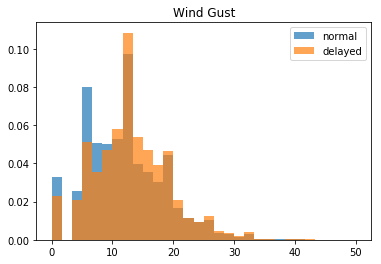

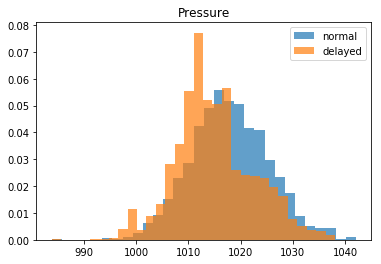

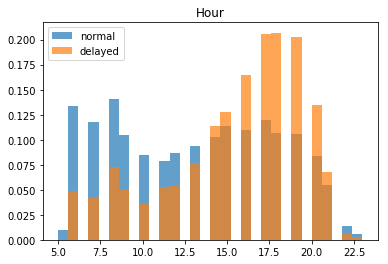

In [46]:
# Anything unusual about these flights?
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.hist(flights_weather.dropna().wind_gust, 30, range=(0, 50), normed=True, label='normal', alpha=.7)
plt.hist(flights_weather_posdelays.dropna().wind_gust, 30, range=(0,50), normed=True, label='delayed', alpha=.7)
plt.legend(loc='best')
plt.title('Wind Gust')

plt.figure()
plt.hist(flights_weather.dropna().pressure, 30,  normed=True, label='normal', alpha=.7)
plt.hist(flights_weather_posdelays.dropna().pressure, 30,  normed=True, label='delayed', alpha=.7)
plt.legend(loc='best')
plt.title('Pressure')

plt.figure()
plt.hist(flights_weather.dropna().hour, 30,  normed=True, label='normal', alpha=.7)
plt.hist(flights_weather_posdelays.dropna().hour, 30,  normed=True, label='delayed', alpha=.7)
plt.legend(loc='best')
plt.title('Hour')

## Arranging a dataframe // What's the weather like for the most and least delayed flights?

Let's sort the `flights_weather` dataframe on `dep_delay` and get data for the top 10 and bottom 10 delays.

In [47]:
flights_weather.sort_values('dep_delay').head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
88035,2013,12,7,2040.0,2123,-43.0,40.0,2352,48.0,B6,...,37.94,17.96,44.00,320.0,10.35702,11.918651,0.0,1028.6,10.0,2013-12-07 13:00:00
110365,2013,2,3,2022.0,2055,-33.0,2240.0,2338,-58.0,DL,...,30.20,17.60,59.01,320.0,6.90468,7.945768,0.0,NaN,10.0,2013-02-03 12:00:00
63300,2013,11,10,1408.0,1440,-32.0,1549.0,1559,-10.0,EV,...,53.96,30.02,39.72,260.0,12.65858,14.567241,0.0,1011.5,10.0,2013-11-10 06:00:00
9559,2013,1,11,1900.0,1930,-30.0,2233.0,2243,-10.0,DL,...,39.92,33.08,76.32,60.0,9.20624,10.594357,0.0,1026.2,10.0,2013-01-11 11:00:00
24553,2013,1,29,1703.0,1730,-27.0,1947.0,1957,-10.0,F9,...,39.02,33.98,81.95,60.0,11.50780,13.242946,0.0,1019.9,5.0,2013-01-29 09:00:00
278140,2013,8,9,729.0,755,-26.0,1002.0,955,7.0,MQ,...,73.94,71.06,90.73,170.0,9.20624,10.594357,0.0,1014.6,10.0,2013-08-08 23:00:00
158553,2013,3,30,2030.0,2055,-25.0,2213.0,2250,-37.0,MQ,...,55.94,17.96,22.32,300.0,9.20624,10.594357,0.0,1017.9,10.0,2013-03-30 13:00:00
47484,2013,10,23,1907.0,1932,-25.0,2143.0,2143,0.0,EV,...,55.94,33.08,41.82,NaN,3.45234,3.972884,0.0,1003.2,10.0,2013-10-23 11:00:00
190908,2013,5,5,934.0,958,-24.0,1225.0,1309,-44.0,B6,...,46.94,37.94,70.74,80.0,9.20624,10.594357,0.0,1025.0,10.0,2013-05-05 01:00:00
199143,2013,5,14,914.0,938,-24.0,1143.0,1204,-21.0,9E,...,44.96,32.00,60.20,310.0,13.80936,15.891535,0.0,1019.3,10.0,2013-05-14 01:00:00


In [48]:
flights_weather.sort_values('dep_delay', ascending=False).head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour_y
7008,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,...,35.06,33.08,92.40,0.0,0.00000,0.000000,0.0,1028.6,9.0,2013-01-09 01:00:00
228334,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,...,78.08,50.00,37.38,220.0,10.35702,11.918651,0.0,1013.8,10.0,2013-06-15 11:00:00
8190,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,...,46.94,21.92,36.85,330.0,13.80936,15.891535,0.0,1032.0,10.0,2013-01-10 08:00:00
316553,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,...,73.94,53.96,49.66,180.0,12.65858,14.567241,0.0,1017.7,10.0,2013-09-20 10:00:00
261509,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,...,84.92,71.96,65.23,120.0,10.35702,11.918651,0.0,1013.7,10.0,2013-07-22 08:00:00
168435,2013,4,10,1100.0,1900,960.0,1342.0,2211,931.0,DL,...,60.08,46.04,59.72,140.0,17.26170,19.864419,0.0,1012.8,10.0,2013-04-10 11:00:00
145919,2013,3,17,2321.0,810,911.0,135.0,1020,915.0,DL,...,33.08,23.00,66.11,320.0,12.65858,14.567241,0.0,1014.9,10.0,2013-03-17 01:00:00
239336,2013,6,27,959.0,1900,899.0,1236.0,2226,850.0,DL,...,80.60,71.60,74.11,170.0,9.20624,10.594357,0.0,NaN,9.0,2013-06-27 11:00:00
261386,2013,7,22,2257.0,759,898.0,121.0,1026,895.0,DL,...,75.92,69.98,81.85,60.0,6.90468,7.945768,0.0,1013.5,10.0,2013-07-21 23:00:00
85925,2013,12,5,756.0,1700,896.0,1058.0,2020,878.0,AA,...,55.40,53.60,93.65,0.0,0.00000,0.000000,0.0,NaN,2.0,2013-12-05 09:00:00


## Some other tidying
## Capitalization issues.

In [49]:
flights_complete.dest.str.lower().head() # For string columns, use .str to access string methods

0    iah
1    iah
2    mia
3    bqn
4    atl
Name: dest, dtype: object

In [50]:
flights_complete.dest.str.upper().head()

0    IAH
1    IAH
2    MIA
3    BQN
4    ATL
Name: dest, dtype: object

## Wide to long formatted data

In [51]:
flights_complete.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [52]:
day_delay = pd.melt(flights_complete, id_vars=['hour', 'time_hour'], value_vars=['dep_delay', 'arr_delay'], var_name='type_of_delay')
day_delay

,hour,time_hour,type_of_delay,value
0,5,2013-01-01 05:00:00,dep_delay,2.0
1,5,2013-01-01 05:00:00,dep_delay,4.0
2,5,2013-01-01 05:00:00,dep_delay,2.0
3,5,2013-01-01 05:00:00,dep_delay,-1.0
4,6,2013-01-01 06:00:00,dep_delay,-6.0
5,5,2013-01-01 05:00:00,dep_delay,-4.0
6,6,2013-01-01 06:00:00,dep_delay,-5.0
7,6,2013-01-01 06:00:00,dep_delay,-3.0
8,6,2013-01-01 06:00:00,dep_delay,-3.0
9,6,2013-01-01 06:00:00,dep_delay,-2.0


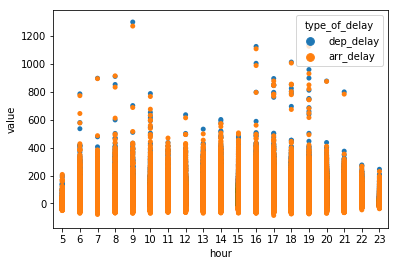

In [53]:
plt.figure()
sns.stripplot(x='hour', y='value', hue='type_of_delay', data=day_delay)

Well this is a bit hard to read. What about the first entry for each type of delay in each hour? 

## Removing duplicates

In [54]:
day_delay_first = day_delay.drop_duplicates('time_hour', keep='first')
day_delay_first.head()

,hour,time_hour,type_of_delay,value
0,5,2013-01-01 05:00:00,dep_delay,2.0
4,6,2013-01-01 06:00:00,dep_delay,-6.0
53,7,2013-01-01 07:00:00,dep_delay,-7.0
103,8,2013-01-01 08:00:00,dep_delay,-2.0
151,18,2013-01-01 18:00:00,dep_delay,853.0


## An incomplete investigation of NAs 

Let's examine where there are NAs in the `flights` dataset.

In [55]:
flights.isnull().sum(axis=0)

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [56]:
flights_incomplete = flights.loc[flights.isnull().any(axis=1)]
flights_incomplete.shape

(9430, 19)

Do flights with NA departure time also have an NA departure delay?

In [57]:
pd.crosstab(
    index=flights_incomplete.dep_time.isnull(),   # Series of bool values
    columns=flights_incomplete.dep_delay.isnull() # series of bool values
)

dep_delay,False,True
dep_time,,
False,1175,0
True,0,8255


Yes